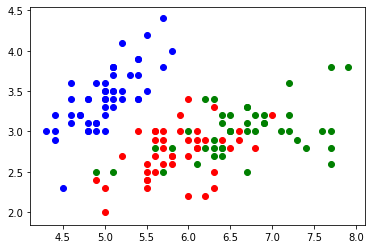

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp, pi

data = np.loadtxt("dataSets/ldaData.txt")

c1 = np.array(data[:50])
c2 = np.array(data[50:93])
c3 = np.array(data[93:])

plt.scatter(c1.T[0], c1.T[1], color='blue')
plt.scatter(c2.T[0], c2.T[1], color='red')
plt.scatter(c3.T[0], c3.T[1], color='green')

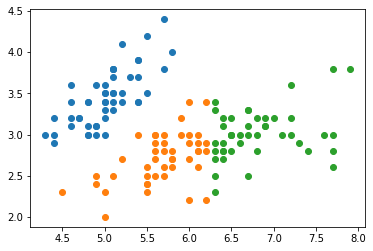

In [80]:
class LDA:
    def __init__(self, classes):
        self.classes = classes
        self.means = [self.mean(c) for c in classes]
        self.cov = self.covariance()
        self.priors = [self.prior(c) for c in classes]
        
        
    def class_of_x(self, x):
        best_class_index = -1
        best_class = None
        highest_disc = float('-inf')
        decision_boundary = False
        for index, cl in enumerate(self.classes):
            disc_cl = self.discriminant(x, self.priors[index], self.means[index])
            if disc_cl > highest_disc:
                best_class_index = index
                best_class = cl
                highest_disc = disc_cl
                decision_boundary = False
            elif disc_cl == highest_disc:
                decision_boundary = True
        if decision_boundary:
            return -1, None
        else:
            return best_class_index, best_class
            
    def mean(self, c):
        return sum(c) / len(c)
    
    def covariance(self):
        total_samples = sum([len(c) for c in self.classes])
        return sum([sum([(x - self.mean(c))@(x-self.mean(c)).T for x in c]) for c in self.classes]) / (total_samples - len(self.classes))
        
    def prior(self, c):
        total_samples = sum([len(c) for c in self.classes])
        return len(c) / total_samples
    
    def discriminant(self, x, prior_c, mean_c):
        return log(prior_c) - 0.5 * mean_c.T@np.linalg.inv(self.cov)@mean_c + x.T@np.linalg.inv(self.cov)@mean_c


c1.shape = (c1.shape[0], c1.shape[1], 1)
c2.shape = (c2.shape[0], c2.shape[1], 1)
c3.shape = (c3.shape[0], c3.shape[1], 1)

classes = [c1, c2, c3]
    
lda = LDA(classes)

class_points =[[], [], [], []]

for x in data:
    i, _ = lda.class_of_x(x)
    class_points[i].append(x)

for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1])


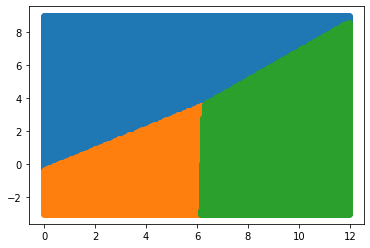

In [50]:
plotspace = np.mgrid[0:12:0.05, -3:9:0.05].reshape(2, -1).T # linspace for 2D

class_points =[[], [], [], []]

for x in plotspace:
    i, _ = lda.class_of_x(x)
    class_points[i].append(x)

for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1])

{0: {1: array([[-0.1300546 ],
       [ 0.14939552]]), 2: array([[-0.1107184 ],
       [ 0.12897888]])}, 1: {2: array([[-0.02423282],
       [-0.01054379]])}, 2: {}}
[[-0.1300546 ]
 [ 0.14939552]]
W1 [-0.14039414 -0.18908098 -0.13319096 -0.13512505 -0.11244913 -0.11965231
 -0.09030639 -0.14232823 -0.13899323 -0.17414143 -0.14953142 -0.11631731
 -0.17607552 -0.11104822 -0.1567346  -0.08397093 -0.11965231 -0.14039414
 -0.17360824 -0.09557548 -0.19435007 -0.11051504 -0.06042729 -0.17027324
 -0.11631731 -0.20208644 -0.14232823 -0.1533996  -0.16833915 -0.13319096
 -0.16113597 -0.19435007 -0.06376229 -0.08783912 -0.17414143 -0.17220734
 -0.19241598 -0.09944367 -0.12405368 -0.15533369 -0.12738868 -0.241636
 -0.09417458 -0.12738868 -0.09557548 -0.17607552 -0.09557548 -0.1201855
 -0.13652596 -0.15726778]
[[-0.1107184 ]
 [ 0.12897888]]
W1 [-0.11323776 -0.15558352 -0.10764407 -0.10947012 -0.08926804 -0.09486173
 -0.07077645 -0.11506381 -0.11312221 -0.14268563 -0.12065751 -0.09292013
 -0.14451168 -

W1 [-0.14039414 -0.18908098 -0.13319096 -0.13512505 -0.11244913 -0.11965231
 -0.09030639 -0.14232823 -0.13899323 -0.17414143 -0.14953142 -0.11631731
 -0.17607552 -0.11104822 -0.1567346  -0.08397093 -0.11965231 -0.14039414
 -0.17360824 -0.09557548 -0.19435007 -0.11051504 -0.06042729 -0.17027324
 -0.11631731 -0.20208644 -0.14232823 -0.1533996  -0.16833915 -0.13319096
 -0.16113597 -0.19435007 -0.06376229 -0.08783912 -0.17414143 -0.17220734
 -0.19241598 -0.09944367 -0.12405368 -0.15533369 -0.12738868 -0.241636
 -0.09417458 -0.12738868 -0.09557548 -0.17607552 -0.09557548 -0.1201855
 -0.13652596 -0.15726778]
[[-0.1107184 ]
 [ 0.12897888]]
W1 [-0.11323776 -0.15558352 -0.10764407 -0.10947012 -0.08926804 -0.09486173
 -0.07077645 -0.11506381 -0.11312221 -0.14268563 -0.12065751 -0.09292013
 -0.14451168 -0.08915248 -0.1262512  -0.06358781 -0.09486173 -0.11323776
 -0.14097514 -0.0745441  -0.15935117 -0.08744199 -0.04498068 -0.13903354
 -0.09292013 -0.16665536 -0.11506381 -0.1243096  -0.13720749 -0.

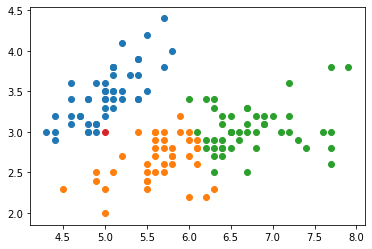

In [7]:
class oneononeLDA:
    def __init__(self, classes):
        self.classes = classes
        self.weightMap = {}
        self.meanMap = {}
        self.getWeightMap()
        print(self.weightMap)
        
    def getWeight(c1, c2):
        return np.linalg.inv(oneononeLDA.within_class_cov(c1, c2))@(oneononeLDA.mean(c1)-oneononeLDA.mean(c2))
        
        
    def mean(c):
        return sum(c) / len(c)
    
    def within_class_cov(c1, c2):
        mean_c1 = oneononeLDA.mean(c1)
        mean_c2 = oneononeLDA.mean(c2)
        return sum([(x - mean_c1)@(x - mean_c1).T for x in c1]) + sum([(x - mean_c2)@(x - mean_c2).T for x in c2]) 
    
    
    def getWeightMap(self):
        for i in range(len(self.classes)):
            c1 = self.classes[i]
            self.weightMap[i] = {}
            for j in range(i + 1, len(self.classes)):
                c2 = self.classes[j]
                self.weightMap[i][j] = oneononeLDA.getWeight(c1, c2)
                
    def gaussian(x, mean, var):
        return 1/(sqrt(2*pi*var)) * exp(-(x-mean)**2/(2*var))
                
    
    def class_of_x_custom(self, x):
        res = -1
        truth_table = [True for i in range(len(self.classes))]
        for i in range(len(self.classes)):
            c1 = self.classes[i]
            for j in range(i + 1, len(self.classes)):
                c2 = self.classes[j]
                if i == j:
                    continue
                w = self.weightMap[i][j]
                print(w)
                w_c1 = (w.T@c1).reshape(-1)
                w_c2 = (w.T@c2).reshape(-1)
                
                print("W1", w_c1)
                
                mean_1 = np.mean(w_c1)
                mean_2 = np.mean(w_c2)
                var_1 = np.var(w_c1)
                var_2 = np.var(w_c2)
                w0 = mean_1 + (mean_2 - mean_1) * var_1 / (var_1 + var_2)
                if mean_1 < w0:
                    if w.T@x >= w0:
                        truth_table[i] = False
                    else:
                        truth_table[j] = False
                elif mean_1 > w0:
                    if w.T@x <= w0:
                        truth_table[i] = False
                    else:
                        truth_table[j] = False
                else:
                    if mean_2 < w0:
                        if w.T@x < w0:
                            truth_table[i] = False
                        else:
                            truth_table[j] = False
                    elif mean_2 > w0:
                        if w.T@x < w0:
                            truth_table[i] = False
                        else:
                            truth_table[j] = False
            if truth_table[i]:
                return i
        return -1
    
c1.shape = (c1.shape[0], c1.shape[1], 1)
c2.shape = (c2.shape[0], c2.shape[1], 1)
c3.shape = (c3.shape[0], c3.shape[1], 1)
                
classes = [c1, c2, c3]
    
lda = oneononeLDA(classes)

class_points =[[], [], [], []]

for x in data:
    i = lda.class_of_x_custom(x)
    class_points[i].append(x)

for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1])

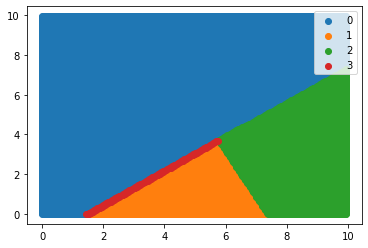

In [117]:
plotspace = np.mgrid[0:10:0.05, 0:10:0.05].reshape(2, -1).T # linspace for 2D

class_points =[[], [], [], []]

for x in plotspace:
    i = lda.class_of_x_custom(x)
    class_points[i].append(x)
    
i = 0
for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1], label=str(i))
    i += 1
plt.legend()